In [1]:
# 구글 드라이브에 연동하여 데이터셋 가져오기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import pandas as pd
# 데이터 파일 경로 지정
file_path = '/content/drive/MyDrive/exa_data/HR.csv'

# 데이터 불러오기
df = pd.read_csv(file_path)

In [3]:
# 나눔 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [4]:
# matplotlib 폰트 설정
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')

In [5]:
# 데이터셋이 가진 컬럼들(=요인들) 출력하기
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# EDA

## 업무성과 파이차트

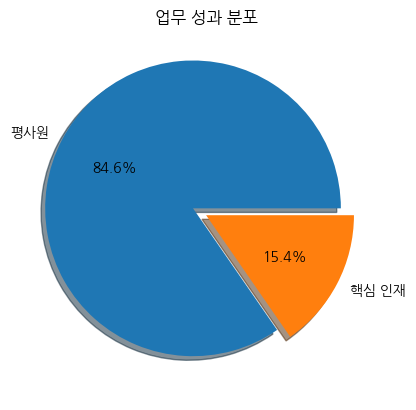

In [9]:
# 업무 성과 분표를 파이차트로 출력
# 파이차트 출력을 위한 matplotlib 불러오기
import matplotlib.pyplot as plt

# 업무 성과 분포를 위해 업무 성과에 따라 그룹핑하기
pie_df = df[['PerformanceRating', 'EmployeeNumber']].groupby(by = ['PerformanceRating']).count()

# autopct = 숫자를 같이 출력(1.1f -> 소수 첫째점 까지)
# shadow = 그림자
# explode = 파이 떨어지게 하기
plt.pie(pie_df['EmployeeNumber'], labels=['평사원', '핵심 인재'], autopct='%1.1f%%',
         shadow= True, explode=[0.1, 0])
plt.title('업무 성과 분포')
plt.show()


업무 성과가 주로 3('excellent')와 4('outstanding')으로 이루어져있음을 알 수 있다.

그렇다면 전체 중 15% 이상의 직원들의 성과는 매우 뛰어난 것을 볼 수 있는데 이들의 차이점을 알아보고자 한다.

# 경력과 업무성과

그러면 경력과 업무 성과는 무슨 관계가 있을까?

일단 업무 성과가 4인 사람들과 3인 사람들의 경력 분포를 확인해보자

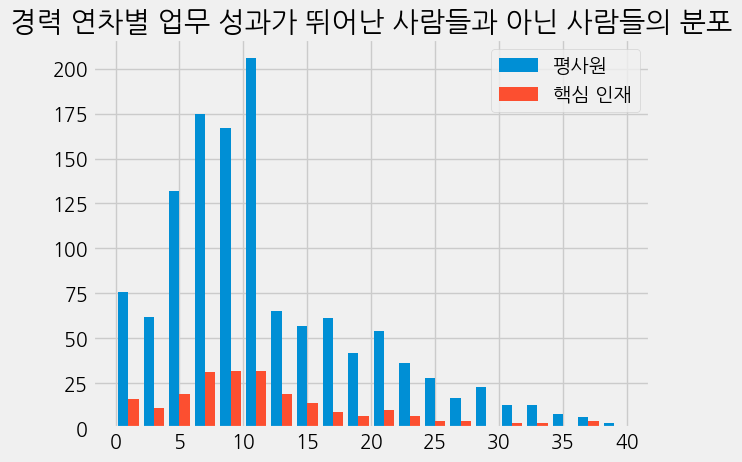

In [17]:
# 업무 성과가 4인 사람들 분류
weight_4 = df[df['PerformanceRating'] == 4]
# 업무 성과가 3인 사람들 분류
weight_3 = df[df['PerformanceRating'] == 3]
# 업무 성과가 3인 사람들과 4인사람들 경력에 따른 분포를 그래프 그리기
plt.hist((weight_3['TotalWorkingYears'],weight_4['TotalWorkingYears']), bins=20, histtype='bar', label=['평사원', '핵심 인재'])
plt.title('경력 연차별 업무 성과가 뛰어난 사람들과 아닌 사람들의 분포')
plt.legend()
plt.show()

보면 그냥 0년차~15년차 사이가 업무성과가 비교적 좋아보이지만 해당 연차에 사람이 많아서 그렇게 느껴질수도 있다는 생각이 들었다.

따라서 해당 연도에 따른 비율로 전환해서 다시 봐야겠다고 생각했다.

비율은 (4에 해당하는 모든 사람의 경력 연차 / 모든 사람의 해당 경력 연차)로 계산하여 시각화했다.

In [18]:
# 경력 연차가 같은 사람들의 누적 합계
df1 = df[['PerformanceRating', 'TotalWorkingYears']].groupby(by = ['TotalWorkingYears']).count()
# 업무 성과가 4인 사람들의 경력 연차별 누적 합계
df2 = weight_4[['PerformanceRating', 'TotalWorkingYears']].groupby(by = ['TotalWorkingYears']).count()
# 조인으로 새로운 데이터프레임으로 합치기 (x= 총합, y=4인사람들 합)
df_merge = pd.merge(df1, df2,how='left', on='TotalWorkingYears')
# 새로운 백분율(4에 해당하는 모든 사람의 경력 연차 / 모든 사람의 해당 경력 연차) 만들기
df_merge['outstanding(%)'] = df_merge['PerformanceRating_y'] / df_merge['PerformanceRating_x'] * 100
pd.DataFrame(df_merge['outstanding(%)'].sort_values(ascending=False)).head()

,outstanding(%)
TotalWorkingYears,
37,50.00
36,33.33
32,33.33
13,30.56
14,29.03


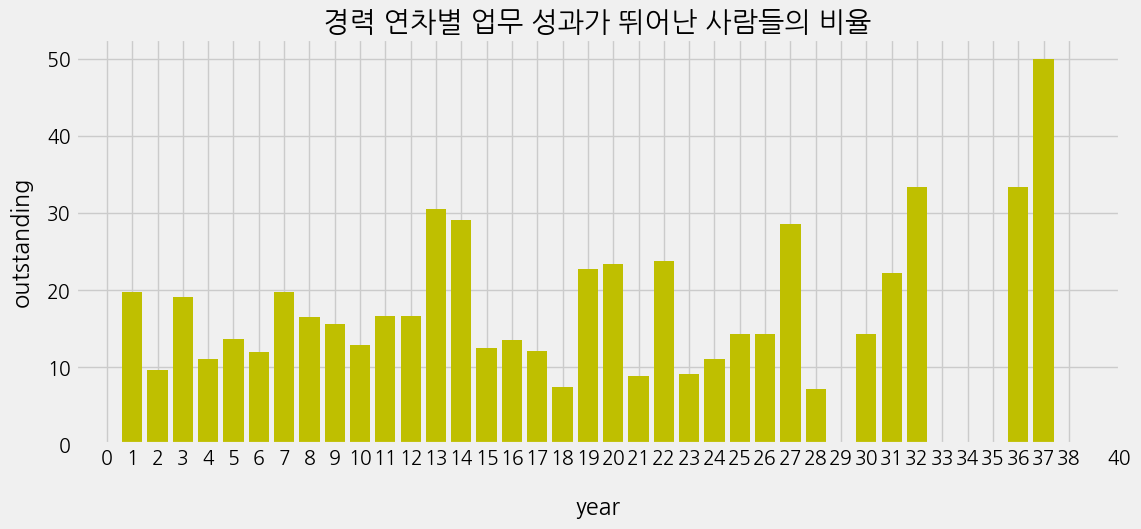

In [19]:
# 소수점 3자리에서 반올림하여 소수점 2자리까지만 출력하기
pd.options.display.float_format = '{:.2f}'.format

# 계산한 비율을 그래프로 그리기
df_merge['outstanding(%)']

# 그래프 스타일 변경
plt.style.use('fivethirtyeight')
# 그래프사이즈 변경
plt.figure(figsize=(12,5))

# x,y 변수 지정하기
x = df_merge.index
y = df_merge['outstanding(%)']
# 막대 그래프 그리기, tick_label= x축 틱에 문자열을 순서대로 나타낼 수 있다
plt.bar(x, y, color='y', tick_label=x)
# x축 이름 정하기
plt.xlabel('year', labelpad=20)
# y축 이름 정하기 labelpad = 그래프와 이름의 간격
plt.ylabel('outstanding', labelpad=10)
plt.title('경력 연차별 업무 성과가 뛰어난 사람들의 비율')
plt.show()

업무 성과가 outstanding인 사람의 비율을 연차별로 보았지만 0년차는 신입이라 생각하여 업무 성과가 outstanding이 될 수 없다고 생각한다.

 29년차, 33~35년차는 outstanding인 사람이 없기 때문에 경력이 높을수록 업무 성과가 더 높다고 보기에는 힘들다고 생각했다.

  그래서 업무 성과는 경력이 0년차가 아닌이상 큰 차이가 없다고 보인다.

## 대시보드


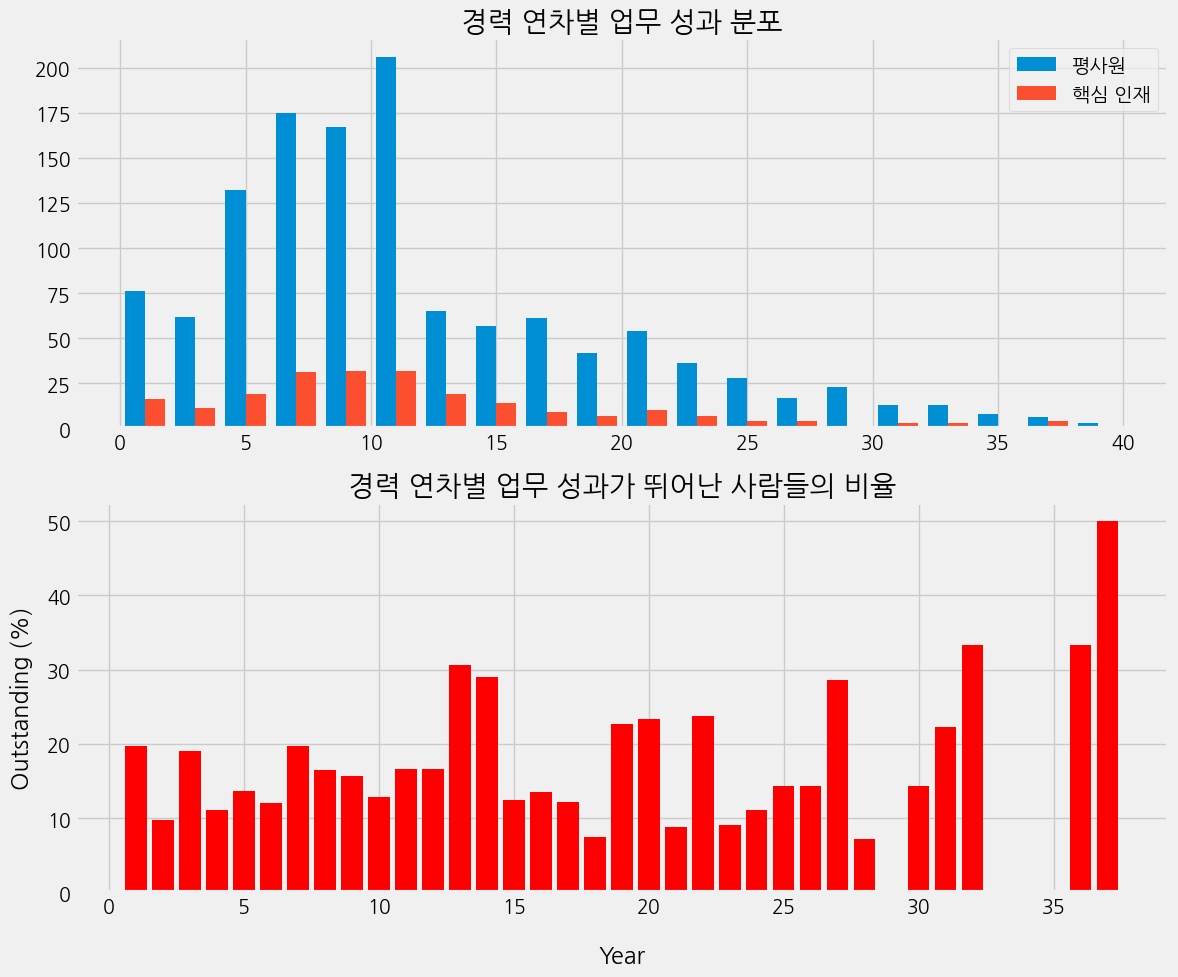

In [30]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import numpy as np

# 그래프 스타일
plt.style.use('fivethirtyeight')

# gridspec 정의
fig = plt.figure(figsize=(12, 10))  # 높이를 더 늘려서 세로로 긴 레이아웃 생성
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1])  # 2개의 행 설정

# 첫 번째 그래프
ax0 = fig.add_subplot(gs[0])
ax0.hist([weight_3['TotalWorkingYears'], weight_4['TotalWorkingYears']], bins=20, histtype='bar', label=['평사원', '핵심 인재'])
ax0.set_title('경력 연차별 업무 성과 분포')
ax0.legend()

# 두 번째 그래프
ax1 = fig.add_subplot(gs[1])
x = df_merge.index
y = df_merge['outstanding(%)']
ax1.bar(x, y, color='red')
ax1.set_xlabel('Year', labelpad=20)
ax1.set_ylabel('Outstanding (%)', labelpad=10)
ax1.set_title('경력 연차별 업무 성과가 뛰어난 사람들의 비율')

# 전체 플롯 보여주기
plt.tight_layout()
plt.show()

# 워라벨과 업무 성과

그렇다면 요즘 워라벨이 보장되는 곳에 가고싶어하는 사람들이 많은데 과연 워라벨과 업무 성과는 서로 관련이 있을까?

먼저 1~4단계의 워라벨과 업무성과의 분포를 히스토그램으로 확인해본다.

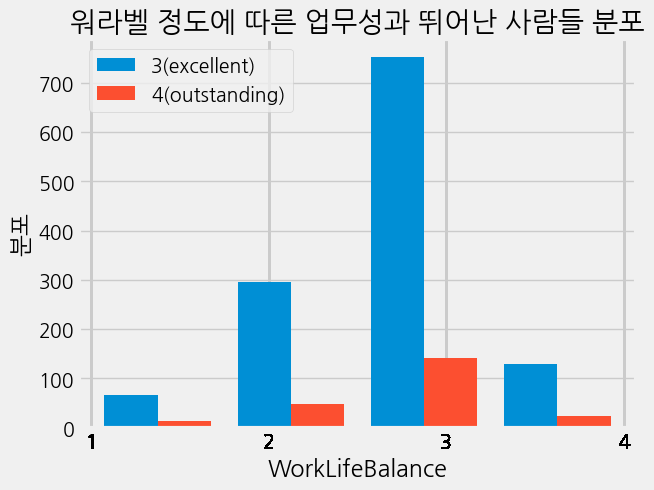

In [31]:
# 업무 성과가 4인 사람들 분류
weight_4 = df[df['PerformanceRating'] == 4]
# 업무 성과가 3인 사람들 분류
weight_3 = df[df['PerformanceRating'] == 3]
# 업무 성과가 3인 사람들과 4인사람들 워라벨에 따른 분포를 그래프 그리기
plt.hist((weight_3['WorkLifeBalance'],weight_4['WorkLifeBalance']), bins=4, histtype='bar', label=['3(excellent)','4(outstanding)'])
# x 축에 출력되는 값의 범위 지정
plt.xticks(df['WorkLifeBalance'])
# x축 y축 레이블 이름 정하기
plt.ylabel('분포')
plt.xlabel('WorkLifeBalance')
plt.title('워라벨 정도에 따른 업무성과 뛰어난 사람들 분포')
plt.legend()
plt.show()

In [32]:
# 워라벨 정도별 사람들의 누적 합계
df1 = df[['PerformanceRating', 'WorkLifeBalance']].groupby(by = ['WorkLifeBalance']).count()
# 업무 성과가 4인 사람들의 워라벨 정도별 합계
df2 = weight_4[['PerformanceRating', 'WorkLifeBalance']].groupby(by = ['WorkLifeBalance']).count()
# 조인으로 새로운 데이터프레임으로 합치기 (x= 총합, y=4인사람들 합)
df_merge = pd.merge(df1, df2,how='left', on='WorkLifeBalance')
# 새로운 백분율(성과가 뛰어난 사람들의 워라벨 정도 / 성과가 평범한 사람들의 워라벨 정도) 만들기
df_merge['outstanding(%)'] = df_merge['PerformanceRating_y'] / df_merge['PerformanceRating_x'] * 100
pd.DataFrame(df_merge['outstanding(%)'].sort_values(ascending=False)).head()

,outstanding(%)
WorkLifeBalance,
1,17.50
3,15.79
4,15.03
2,13.95


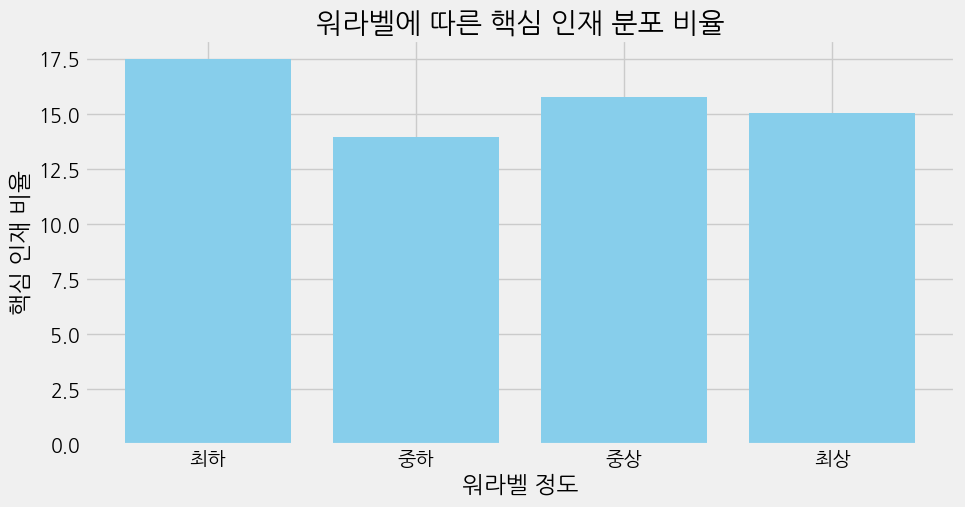

In [37]:
# 그래프 스타일 설정
plt.style.use('fivethirtyeight')

# 그래프 사이즈 설정
plt.figure(figsize=(10, 5))

# 바 차트 그리기
plt.bar(df_merge.index, df_merge['outstanding(%)'], color='skyblue')
plt.xlabel('워라벨 정도')
plt.ylabel('핵심 인재 비율')
plt.title('워라벨에 따른 핵심 인재 분포 비율')
plt.xticks(ticks=df_merge.index, labels=['최하', '중하', '중상', '최상'])  # 워라벨 레벨 이름 지정
plt.show()

워라벨 정도가 1인 사람들이 업무 성과가 outstanding인 비율이 높으므로 업무 성과를 위해 워라벨을 챙겨줄 필요는 없어 보인다. 하지만 정도가 2인 사람들보다 3과 4인 사람들이 더 높은 비율로 업무 성과가 outstanding이므로 워라벨을 3과 4로 올려서 전체적인 outstanding 비율을 올릴 방법을 생각해야 할거 같다.

## 대시보드

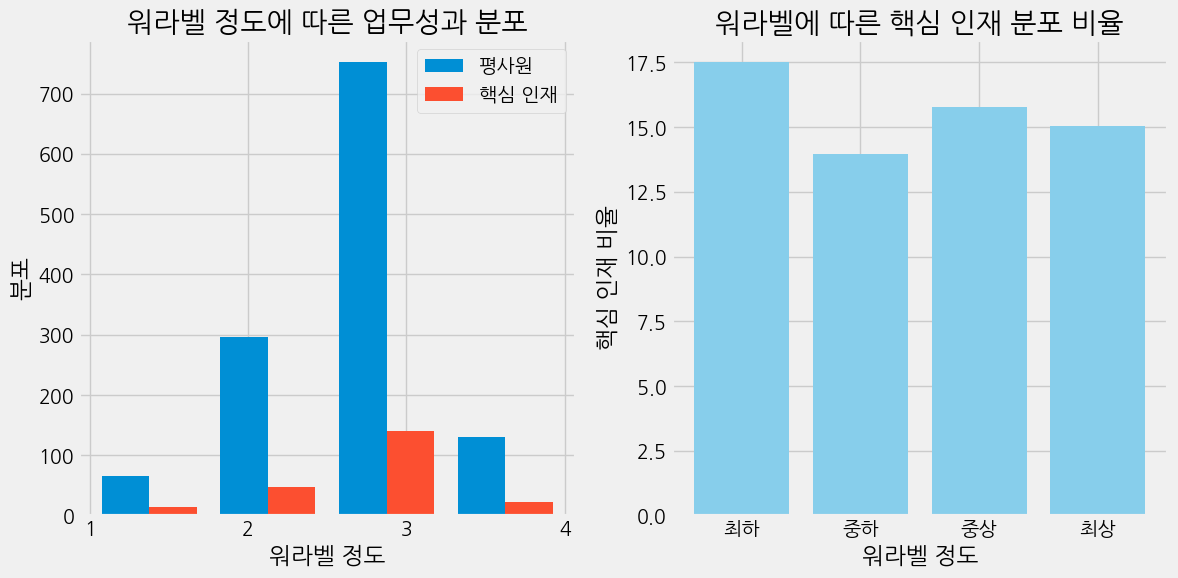

In [38]:
# 워라벨 정도별 사람들의 누적 합계
df1 = df[['PerformanceRating', 'WorkLifeBalance']].groupby(by=['WorkLifeBalance']).count()
# 업무 성과가 4인 사람들의 워라벨 정도별 합계
df2 = weight_4[['PerformanceRating', 'WorkLifeBalance']].groupby(by=['WorkLifeBalance']).count()
# 조인으로 새로운 데이터프레임으로 합치기 (x= 총합, y=4인 사람들 합)
df_merge = pd.merge(df1, df2, how='left', on='WorkLifeBalance')
df_merge.columns = ['Total', 'Outstanding']
df_merge['outstanding(%)'] = df_merge['Outstanding'] / df_merge['Total'] * 100

# 그래프 생성
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

# 첫 번째 그래프
ax0 = plt.subplot(gs[0])
ax0.hist([weight_3['WorkLifeBalance'], weight_4['WorkLifeBalance']], bins=4, histtype='bar', label=['평사원', '핵심 인재'])
ax0.set_xticks([1, 2, 3, 4])
ax0.set_xlabel('워라벨 정도')
ax0.set_ylabel('분포')
ax0.set_title('워라벨 정도에 따른 업무성과 분포')
ax0.legend()

# 두 번째 그래프
ax1 = plt.subplot(gs[1])
ax1.bar(df_merge.index, df_merge['outstanding(%)'], color='skyblue')
ax1.set_xlabel('워라벨 정도')
ax1.set_ylabel('핵심 인재 비율')
ax1.set_title('워라벨에 따른 핵심 인재 분포 비율')
ax1.set_xticks(df_merge.index)
ax1.set_xticklabels(['최하', '중하', '중상', '최상'])

plt.tight_layout()
plt.show()

# 마지막 승진과 업무 성과의 관계

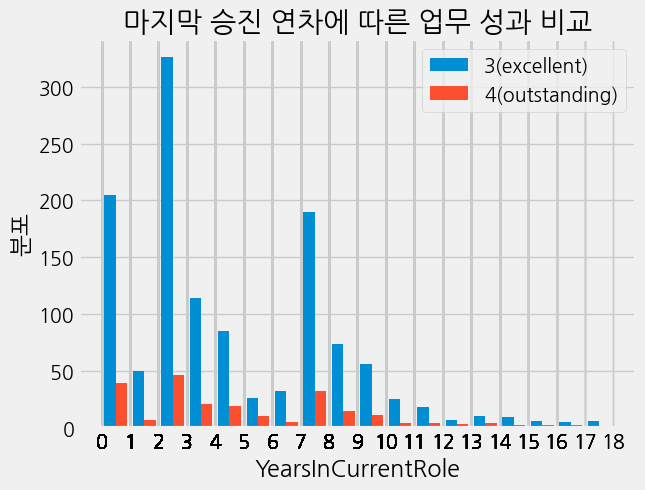

In [39]:
# 업무 성과가 4인 사람들 분류
weight_4 = df[df['PerformanceRating'] == 4]
# 업무 성과가 3인 사람들 분류
weight_3 = df[df['PerformanceRating'] == 3]
# 업무 성과가 3인 사람들과 4인사람들 마지막 승진 연차에 따른 분포를 그래프 그리기
plt.hist((weight_3['YearsInCurrentRole'],weight_4['YearsInCurrentRole']), bins=18
         , histtype='bar', label=['3(excellent)','4(outstanding)'])
# x 축에 출력되는 값의 범위 지정
plt.xticks(df['YearsInCurrentRole'])
# x축 y축 레이블 이름 정하기
plt.ylabel('분포')
plt.xlabel('YearsInCurrentRole')
plt.title('마지막 승진 연차에 따른 업무 성과 비교')
plt.legend()
plt.show()

    YearsInCurrentRole  outstanding(%)
0                    0           15.98
1                    1           12.28
2                    2           12.37
3                    3           15.56
4                    4           18.27
5                    5           27.78
6                    6           13.51
7                    7           14.41
8                    8           16.85
9                    9           16.42
10                  10           13.79
11                  11           18.18
12                  12           30.00
13                  13           28.57
14                  14           18.18
15                  15           25.00
16                  16           28.57
17                  17             NaN
18                  18             NaN


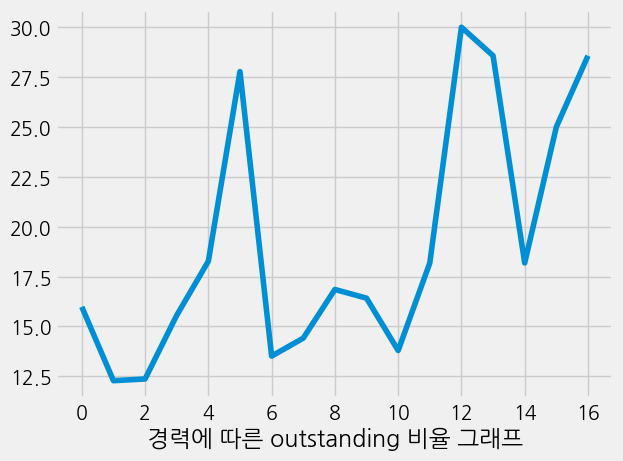

In [40]:
# 마지막 승진 연차가 같은 사람들의 누적 합계
df1 = df[['PerformanceRating', 'YearsInCurrentRole']].groupby(by = ['YearsInCurrentRole']).count()
# 업무 성과가 4인 사람들의 경력 연차별 누적 합계
df2 = weight_4[['PerformanceRating', 'YearsInCurrentRole']].groupby(by = ['YearsInCurrentRole']).count()
# 조인으로 새로운 데이터프레임으로 합치기 (x= 총합, y=4인사람들 합)
df_merge = pd.merge(df1, df2,how='left', on='YearsInCurrentRole')
# 새로운 백분율(승진 연차가 같은 사람들의 업무 성과가 뛰어난 비율) 만들기
df_merge['outstanding(%)'] = df_merge['PerformanceRating_y'] / df_merge['PerformanceRating_x'] * 100
# outstanding비율만 만들기
df_merge = pd.DataFrame(df_merge['outstanding(%)'])
# 인덱스에 있는 데이터를 열로 바꾸기
df_merge = df_merge.reset_index()
print(df_merge)
# 마지막 승진 연차에 따른 업무 성과 비율 그래프 그리기
plt.plot(df_merge['YearsInCurrentRole'], df_merge['outstanding(%)'], '-', color='C0')
plt.xlabel('경력에 따른 outstanding 비율 그래프')
plt.show()

# 규정외 노동시간과 업무 성과

In [41]:
# 규정외 노동시간 여부가 같은 사람들의 누적 합계
df1 = df[['PerformanceRating', 'OverTime']].groupby(by = ['OverTime']).count()
# 업무 성과가 4인 사람들의 규정외 노동시간 여부에 따른 누적 합계
df2 = weight_4[['PerformanceRating', 'OverTime']].groupby(by = ['OverTime']).count()
# 조인으로 새로운 데이터프레임으로 합치기 (x= 총합, y=4인사람들 합)
df_merge = pd.merge(df1, df2,how='left', on='OverTime')
# 새로운 백분율(4에 해당하는 모든 사람의 경력 연차 / 모든 사람의 해당 경력 연차) 만들기
df_merge['outstanding(%)'] = df_merge['PerformanceRating_y'] / df_merge['PerformanceRating_x'] * 100
df_merge.sort_values(by='outstanding(%)', ascending=False).head()

,PerformanceRating_x,PerformanceRating_y,outstanding(%)
OverTime,,,
Yes,416,65,15.62
No,1054,161,15.28


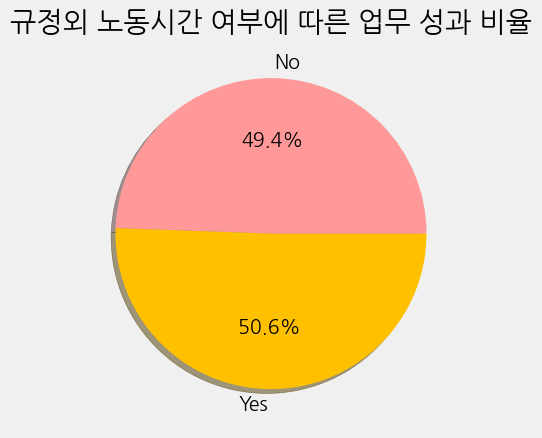

In [42]:
# 업무 성과 분표를 파이차트로 출력
# 파이차트 출력을 위한 matplotlib 불러오기
import matplotlib.pyplot as plt

# 업무 성과 분포를 위해 업무 성과에 따라 그룹핑하기

# autopct = 숫자를 같이 출력(1.1f -> 소수 첫째점 까지)
# shadow = 그림자
# explode = 파이 떨어지게 하기
plt.pie(df_merge['outstanding(%)'], labels=df_merge['outstanding(%)'].index, autopct='%1.1f%%',
         shadow= True, colors=['#ff9999', '#ffc000'])
plt.title('규정외 노동시간 여부에 따른 업무 성과 비율')
plt.show()

규정외 노동을 했을때 업무 성과가 좋은 비율과 규정외 노동을 안했을때 업무 성과가 안좋은 비율은 서로 반반으로 규정외 노동은 업무 성과에 영향을 끼치지 않는다고 볼 수 있다. 그러므로 업무 성과를 내도록 규정외 노동시간을 부여하기 보다는 규정외 노동시간을 주지 않으므로 복지를 챙겨 직원들의 만족도를 끌어 올리는 방법이 좋아보인다.

# 스톡옵션 정도

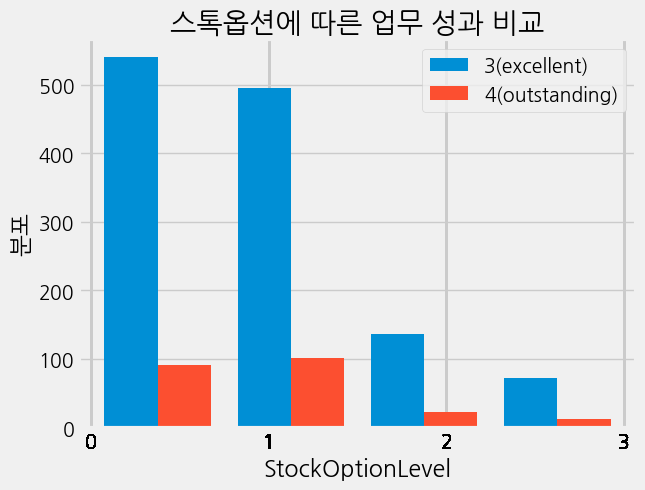

In [43]:
# 업무 성과가 4인 사람들 분류
weight_4 = df[df['PerformanceRating'] == 4]
# 업무 성과가 3인 사람들 분류
weight_3 = df[df['PerformanceRating'] == 3]
# 업무 성과가 3인 사람들과 4인사람들 경력에 따른 분포를 그래프 그리기
plt.hist((weight_3['StockOptionLevel'],weight_4['StockOptionLevel']), bins=4
         , histtype='bar', label=['3(excellent)','4(outstanding)'])
# x 축에 출력되는 값의 범위 지정
plt.xticks(df['StockOptionLevel'])
# x축 y축 레이블 이름 정하기
plt.ylabel('분포')
plt.xlabel('StockOptionLevel')
plt.title('스톡옵션에 따른 업무 성과 비교')
plt.legend()
plt.show()

In [44]:
# 스톡옵션이 같은 사람들의 누적 합계
df1 = df[['PerformanceRating', 'StockOptionLevel']].groupby(by = ['StockOptionLevel']).count()
# 업무 성과가 4인 사람들의 스톡옵션별 누적 합계
df2 = weight_4[['PerformanceRating', 'StockOptionLevel']].groupby(by = ['StockOptionLevel']).count()
# 조인으로 새로운 데이터프레임으로 합치기 (x= 총합, y=4인사람들 합)
df_merge = pd.merge(df1, df2,how='left', on='StockOptionLevel')
# 새로운 백분율(4에 해당하는 모든 사람의 스톡옵션 / 모든 사람의 해당 스톡옵션) 만들기
df_merge['outstanding(%)'] = df_merge['PerformanceRating_y'] / df_merge['PerformanceRating_x'] * 100
# outstanding비율만 만들기
df_merge = pd.DataFrame(df_merge['outstanding(%)'])
# 인덱스에 있는 데이터를 열로 바꾸기
df_merge = df_merge.reset_index()
print(df_merge)

   StockOptionLevel  outstanding(%)
0                 0           14.42
1                 1           16.95
2                 2           13.92
3                 3           14.12


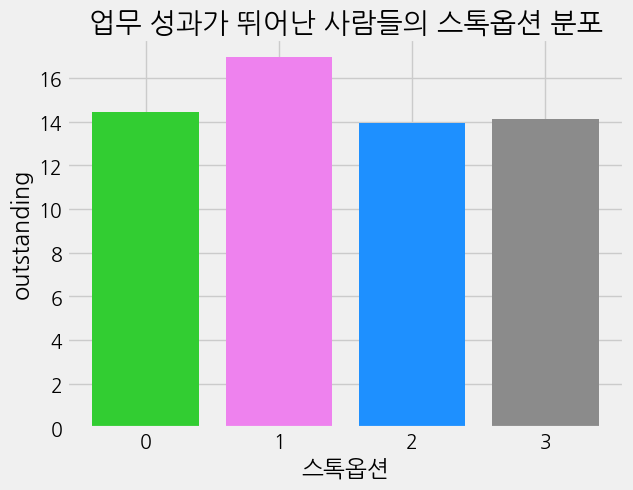

In [45]:
import numpy as np
plt.bar(np.arange(4), df_merge['outstanding(%)'], color = ['limegreen','violet','dodgerblue','C4'])
plt.xticks(np.arange(4), df_merge['outstanding(%)'].index)
plt.xlabel('스톡옵션')
plt.ylabel('outstanding')
plt.title('업무 성과가 뛰어난 사람들의 스톡옵션 분포')
plt.show()

스톡옵션이 1있을때 업무성과가 좋은 직원들의 비율이 더 높다. 스톡옵션이 1있을때의 비율이 0과 2,3 있을때보다 높으므로 2,3의 스톡옵션을 제공하기보다는 0의 스톡옵션을 가진 사람들을 1의 스톡옵션으로 지급하면 직원들의 업무성과를 끌어올릴 수 있어보인다.

# 업무 성과가 뛰어난 사람들은 무슨 특징을 가지고 있을까?
업무 성과가 뛰어난 사람들의 특징을 찾아보고 업무 성과가 낮은 사람들과 해당 특징을 비교해보며 차이점을 파악하고 보완해주는 행동을 취하게 도와주는 프로젝트입니다.

그래서 업무 성과가 높은 사람들의 특징을 찾기 위해 주어진 데이터를 항목별로 나누어 보고 나눈 항목별을 수치로 만들어서 업무 성과가 뛰어난 사람과 뛰어나지 않은 사람들을 서로 비교해 보았습니다.


## 분야별 데이터 분류하고 인사이트 도출하기
- 만족도 관련 = ['EnvironmentSatisfaction', 'WorkLifeBalance', 'RelationshipSatisfaction', 'JobSatisfaction']
    - 만족도가 높으면 업무 성과가 높을까?
- 경력 관련 = ['TotalWorkingYears', 'NumCompaniesWorked', 'YearsAtCompany', 'YearsInCurrentRole', 'TrainingTimesLastYear']
    - 경력이 길면 업무 성과가 높아질까?
- 업무 분야 관련 = [ 'Education', 'EducationField', 'Department', 'JobRole']
    - 업무 분야 = 전공? => 다르면 교육기간이 긴가?
- 급여 관련 = ['MonthlyRate' , 'MonthlyIncome', 'StockOptionLevel', 'DailyRate', 'HourlyRate']
    - 급여가 높으면 업무 성과가 높을까?

## 1. 현재 업무 분야가 전공과 달라도 우수 성과자가 될 수 있을까?
저의 전공이 제가 가려는 분야와 다르기 때문에 과연 가려는 업무와 전공은 연관이 있을까 싶어 분석을 시도해보려 했습니니다.

### 데이터 탐색 및 전처리
전공과 업무 분야 이름이 같은 데이터는 'Human Resources'분야 였고 'Sales'분야는 전공이 'Sales'인 사람들이 없어 'Marketing'이 전공인 사람들을 같은 전공이라고 분류하였습니다. 'Research & Development'의 경우 이 데이터의 회사가 의료 계열 회사로 보여 'Medical', 'Technical Degree', 'Life Sciences' 이 셋의 전공이 같은 전공이라고 분류하여 진행하였습니다.
- ex)
    - 'Sales' 업무 분야 = ['Marketing'] 전공
    - 'Research & Development' 업무 분야 = ['Medical', 'Technical Degree', 'Life Sciences'] 전공

### 분석 방법
전공이 같은 경우의 우수 성과자 비율과 전공이 다른 경우의 우수 성과자 비율을 계산하여 비교하였습니다.

In [46]:
# 업무 분야는 3가지 Research & Development	, Sales	, Human Resources
# 전공은 6가지 Human Resources, Life Sciences, Marketing, Medical, Other, Technical Degree
# 전공이 같은 경우 성과가 뛰어난 사람들 분류하기, 연구 개발 분야는 이 회사가 어떤 분야인지 모르기 때문에 other과 marketing, human resource만 제외하고 나머지
human_weight_4 = weight_4[(weight_4['Department'] == 'Human Resources') & (weight_4['EducationField'] == 'Human Resources')]
sales_weight_4 = weight_4[(weight_4['Department'] == 'Sales') & (weight_4['EducationField'] == 'Marketing')]
develop_weight_4 = weight_4[(weight_4['Department'] == 'Research & Development') &
         ((weight_4['EducationField'] == 'Medical') |
          (weight_4['EducationField'] == 'Technical Degree') |
          (weight_4['EducationField'] == 'Life Sciences'))]
# 전공이 같은데 성과가 낮은 사람들 분류하기
human_weight_3 = weight_3[(weight_3['Department'] == 'Human Resources') & (weight_3['EducationField'] == 'Human Resources')]
sales_weight_3 = weight_3[(weight_3['Department'] == 'Sales') & (weight_3['EducationField'] == 'Marketing')]
develop_weight_3 = weight_3[(weight_3['Department'] == 'Research & Development') &
         ((weight_3['EducationField'] == 'Medical') |
          (weight_3['EducationField'] == 'Technical Degree') |
          (weight_3['EducationField'] == 'Life Sciences'))]

# 전공이 같을 경우의 업무 성과 비율
a = len(human_weight_4)/len(human_weight_3) * 100
b = len(sales_weight_4)/len(sales_weight_3) * 100
c = len(develop_weight_4)/len(develop_weight_3) * 100
abc_list = [a, b, c]
# 전공이 다른 경우 성과가 뛰어난 사람들 분류하기
nhuman_weight_4 = weight_4[(weight_4['Department'] == 'Human Resources') & (weight_4['EducationField'] != 'Human Resources')]
nsales_weight_4 = weight_4[(weight_4['Department'] == 'Sales') & (weight_4['EducationField'] != 'Marketing')]
# Research & Development 분야에는 마케팅과 휴면리소스 전공자가 없어서 other라는 기타 전공자만 포함
ndevelop_weight_4 = weight_4[(weight_4['Department'] == 'Research & Development') &
         (weight_3['EducationField'] == 'Other')]
# 전공이 다른데 성과가 낮은 사람들 분류하기
nhuman_weight_3 = weight_3[(weight_3['Department'] == 'Human Resources') & (weight_3['EducationField'] != 'Human Resources')]
nsales_weight_3 = weight_3[(weight_3['Department'] == 'Sales') & (weight_3['EducationField'] != 'Marketing')]
ndevelop_weight_3 = weight_3[(weight_3['Department'] == 'Research & Development') &
         (weight_3['EducationField'] == 'Other')]

# 전공이 다를 경우의 업무 성과 비율
a = len(nhuman_weight_4)/len(nhuman_weight_3) * 100
b = len(nsales_weight_4)/len(nsales_weight_3) * 100
c = len(ndevelop_weight_4)/len(ndevelop_weight_3) * 100
abc_list2 = [a, b, c]

print('전공이 같은 경우',pd.DataFrame(abc_list))
print('\n 전공이 다른 경우',pd.DataFrame(abc_list2))

전공이 같은 경우       0
0 12.50
1 15.22
2 19.44

 전공이 다른 경우       0
0 20.00
1 16.19
2  0.00


<ipython-input-46-4d6ec447fe1e>:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ndevelop_weight_4 = weight_4[(weight_4['Department'] == 'Research & Development') &


### 분석 시각화

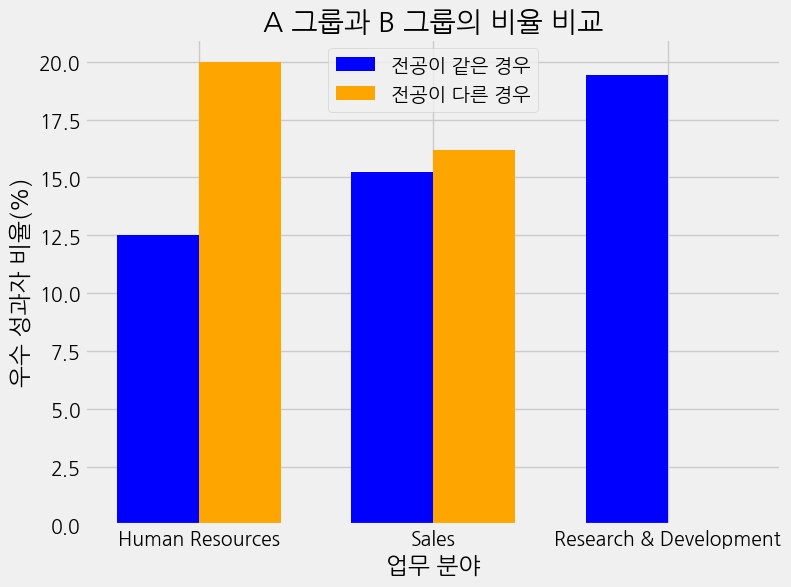

In [51]:
# 그룹의 레이블 설정
labels = ['Human Resources', 'Sales', 'Research & Development']

plt.figure(figsize=(8,6))

# 막대의 너비 설정
bar_width = 0.35
index = np.arange(len(labels))

# A 그룹과 B 그룹의 막대 그래프 생성
plt.bar(index, abc_list, color='blue', label='전공이 같은 경우', width=bar_width, align='center')
plt.bar(index + bar_width, abc_list2, color='orange', label='전공이 다른 경우', width=bar_width, align='center')

# x축 레이블 설정
plt.xticks(index + bar_width / 2, labels)

# 그래프 제목 설정
plt.title('A 그룹과 B 그룹의 비율 비교')

# y축 레이블 설정
plt.ylabel('우수 성과자 비율(%)')
# x축 레이블 설정
plt.xlabel('업무 분야')
# 범례 표시
plt.legend()

# 그래프 표시
plt.show()


### 분석 결과

분석 결과 'Human Resources'분야는 전공이 달랐던 사람들의 성과가 더 높은 비율을 차지하고 있습니다. 'Sales' 분야는 전공과 상관없이 우수 성과자는 15~16%정도의 직원들입니다. 'Human Resources'와 'Sales'분야의 인력을 충원할때는 해당 분야와 상관없는 전공인 사람들을 충원해도 충분히 우수 성과자가 될 수 있습니다. 따라서 전공보다는 회사의 비전과 분위기에 맞는 인재를 뽑는 것이 우수 성과자를 증가시킬 수 있는 포인트입니다.

'Research & Development'의 경우 업무와 전공이 다른 직원들은 우수 성과를 내는 직원은 0% 입니다. 반대로 전공자의 20%는 우수 성과자 입니다. 회사내 우수 성과자들을 늘리기 위해서는 해당 분야 인력을 모집할 경우 반드시 전공자들을 모집하는 것이 유리해보입니다.

## 2. 현재 일하는 것에 대한 만족도가 높으면 성과가 뛰어날까?

'EnvironmentSatisfaction', 'WorkLifeBalance', 'RelationshipSatisfaction', 'JobSatisfaction' 이렇게 4개의 데이터가 만족도에 관련된 데이터 였습니다.
 해당 데이터는 1~4까지의 수치로 되어있었습니다. 직원들의 만족도가 높으면 업무 성과가 뛰어날까에 대한 접근으로 시작되었습니다.

어느 만족도가 업무 성과에 더 영향을 끼치는지 보다는 만족도의 종합 점수가 성과에 미치는 영향을 보려고 했습니다. 업무 성과가 뛰어난 사람들의 만족도 수치의 평균을 구하고 뛰어나지 않은 사람들과의 만족도 수치를 비교해 보았습니다.


In [47]:
# 업무가 뛰어난 사람들의 만족도를 다 더하고 평균을 냄
x = weight_4[['EnvironmentSatisfaction', 'WorkLifeBalance', 'RelationshipSatisfaction', 'JobSatisfaction']].sum(axis=1)
y = weight_3[['EnvironmentSatisfaction', 'WorkLifeBalance', 'RelationshipSatisfaction', 'JobSatisfaction']].sum(axis=1)
print('성과가 뛰어난 사람의 만족도', x.mean())
print('성과가 평범한 사람의 만족도', y.mean())

성과가 뛰어난 사람의 만족도 10.778761061946902
성과가 평범한 사람의 만족도 10.95016077170418


만족도의 평균을 비교해보니 성과가 우수한 사람과 평범한 사람의 만족도의 평균은 서로 비슷했습니다. 좀 더 분석해보고자 평균뿐 아니라 만족도의 분산도 보고자 바이올렛 플롯을 사용하여 시각화 해보았습니다.

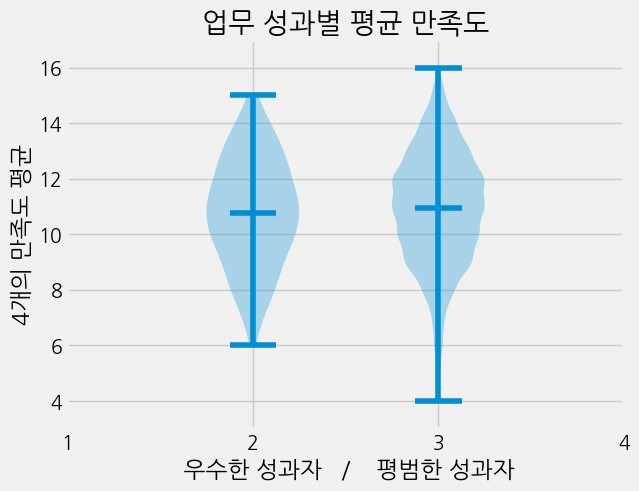

In [48]:
# 바이올렛 플롯 그리기
fig, ax = plt.subplots()

# 위치 지정해주기
violin = ax.violinplot([x, y], positions=[2, 3], showmeans=True)
# y 표기값 지정
ax.set_ylim(3, 17)
# x 표기값 지정
ax.set_xticks([1,2,3, 4])
# 라벨링 지정
ax.set_xlabel(' 우수한 성과자   /    평범한 성과자')
ax.set_ylabel('4개의 만족도 평균')
plt.title('업무 성과별 평균 만족도')
plt.show()


### 분석 결과
성과가 뛰어난 사람의 평균 만족도와 성과가 평범한 사람들의 평균 만족도는 11정도로 서로 비슷합니다. 평균은 비슷하지만 그림을 살펴보면 우수 성과자인 사람들은 4개의 만족도가 모두 1인 사람들은 없습니다. 하지만 우수 성과자가 아닌 사람들의 경우 만족도 합이 모두 1인 사람들이 존재합니다. 이러한 사람들의 만족도가 전부 낮은 이유를 조사해서 해당 인원들의 만족도를 올리는 방안이 필요해보입니다.

## 3. 결혼한 사람들의 워라벨을 보장해주면 업무 성과가 높을까?
결혼한 사람들의 워라벨은 중요하다고 생각하였습니다. 결혼하여 자녀가 있는 경우에는 더 중요하다고 판단되었지만 해당 데이터에는 자녀의 존재 여부는 존재하지 않았습니다. 결혼한 사람들의 워라벨을 보장해주면 업무성과가 증가하지 않을까 싶어 시작하였습니다.

결혼한 사람들을 업무 성과에 따라 분류 하였습니다. 그 후 워라벨 정도에 따라 사람들의 분포를 파악하여 업무 성과가 높은 사람과 업무 성과가 낮은 사람의 워라벨 정도를 비율로 계산하여 분석 하였습니다.


In [49]:
# 결혼한 사람들의 데이터 프레임을 따로 만들기
mweight_4 = weight_4[weight_4['MaritalStatus']=='Married']
mweight_3 = weight_3[weight_3['MaritalStatus']=='Married']
# 결혼한 사람들의 워라벨 정도별 분포 파악하기
df1 = mweight_4[['WorkLifeBalance', 'MaritalStatus']].groupby(by = ['WorkLifeBalance']).count()
df2 = mweight_3[['WorkLifeBalance', 'MaritalStatus']].groupby(by = ['WorkLifeBalance']).count()
# 파악한 결혼한 사람들의 워라벨 수치별 분포를 업무가 뛰어난 사람들과 뛰어나지 않은 사람들의 비율로 나타내기
print('성과가 뛰어난 결혼한 사람들의 워라벨 정도 \n', df1 / len(mweight_4) * 100)
print('\n 성과가 평범한 결혼한 사람들의 워라벨 정도 \n',df2 / len(mweight_3) * 100)

성과가 뛰어난 결혼한 사람들의 워라벨 정도 
                  MaritalStatus
WorkLifeBalance               
1                         5.66
2                        16.04
3                        70.75
4                         7.55

 성과가 평범한 결혼한 사람들의 워라벨 정도 
                  MaritalStatus
WorkLifeBalance               
1                         6.35
2                        23.99
3                        58.20
4                        11.46


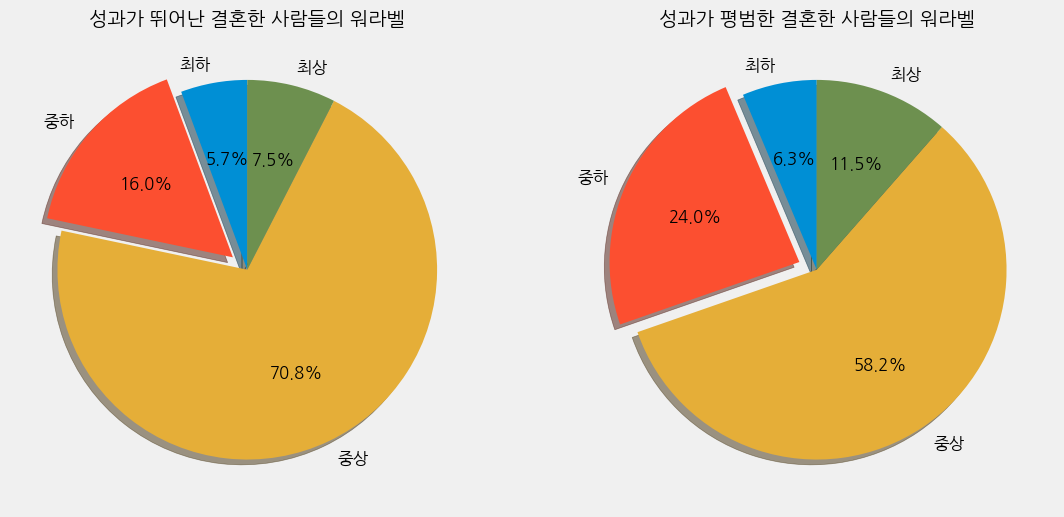

In [52]:
# 데이터 설정
labels = ['최하', '중하', '중상', '최상']
sizes1 = df1['MaritalStatus']
sizes2 = df2['MaritalStatus']

# 서브 플롯 생성
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# 첫 번째 파이 차트 그리기
plt.subplot(1, 2, 1)
ax1.pie(sizes1, labels=labels, autopct='%1.1f%%', startangle=90,explode=[0, 0.1,0,0],
         textprops={'fontsize': 12}, shadow=True)

ax1.set_title('성과가 뛰어난 결혼한 사람들의 워라벨', fontsize=14)

# 두 번째 파이 차트 그리기
plt.subplot(1, 2, 2)
ax2.pie(sizes2, labels=labels, autopct='%1.1f%%', startangle=90,explode=[0, 0.1,0,0],
         textprops={'fontsize': 12}, shadow=True)
ax2.set_title('성과가 평범한 결혼한 사람들의 워라벨', fontsize=14)


# 그래프 표시
plt.show()

### 분석 결과
파이차트를 비교해보면 결혼한 사람들중 성과가 뛰어난 사람들의 워라벨 정도가 2인 비율이 성과가 평범한 사람들의 워라벨 정도가 2인 비율보다 8% 낮습니다. 이는 결혼한 직원들의 워라벨 정도를 3까지 보장해주면 우수성과자가 될 수 있음을 의미합니다.

결혼한 사람들의 워라벨을 보장해주기 위한 회사내 복지 정책 추진이 필요해보입니다. 기혼 가정의 워라벨이 보장되면 직원들의 우수 성과자 비율이 증가할 것으로 보입니다. 기혼 가정에 대해 결혼 기념일 조기퇴근 혹은 육아 휴직 장려 등 워라벨 관련 복지를 제공해주면 좋을것 같습니다.  그러면 관련 복지로 인해 지출되었던 비용이 우수 성과로 인해 더 큰 성과로 보답될 것 입니다.